<a href="https://colab.research.google.com/github/iciromaco/RadiShLab/blob/master/S1_%E6%8F%8F%E7%94%BB%E9%96%A2%E6%95%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  N001 基本関数

## 前提
Google Colaboratory での実行を想定しています。
- Google Drive に [RadiShLab](https://github.com/iciromaco/RadiShLab) フォルダをコピーしてください。

ローカルPCで実行させる場合はパスが出てくる部分などを適当に書き換えてください。

- (Colab) と書かれている部分は Google Colaboratory でのみ有効なコードです。 

## Google ドライブに接続（Colab）
次のセルを実行し、表示されたリンク先にアクセスし、接続を許可します。表示されたコードを枠内にペーストしてEnterすると、左のエリアに drive というフォルダが現れます。

このフォルダ内の MyDrive は自分の Google Drive そのものです。



In [1]:
import sys
try:
    from google.colab import drive
    drive.mount('/content/drive')
    sys.path.append('/content/drive/MyDrive/RadiShLab/rdlib')
    COLABORATORY = True
except ImportError:
    COLABORATORY = False
    sys.path.append('./rdlib')

# RadishLabのライブラリのインポート


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython import display
import rdlib8 as rd
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

# (1) フォルダ内の画像の収集

In [3]:
# サンプルの画像フォルダのパス (Colab)
if COLABORATORY:
    DATAFOLDER = '/content/drive/MyDrive/RadiShLab/RDSamples/original'
else:
    DATAFOLDER = 'RDSamples/original'

In [4]:
# 指定フォルダ内の画像のパス名を収集し、３つ目まで表示
imgfiles = rd.collectimagepaths(DATAFOLDER)
imgfiles[:3]

['RDSamples/original\\17daruma5o03_l.jpg',
 'RDSamples/original\\17heians1o04_l.jpg',
 'RDSamples/original\\17horyot1o06_l.jpg']

In [5]:
# 指定フォルダ内の画像を収集
imgs = rd.collectimages(DATAFOLDER)

# サムネイル画像の作成と確認

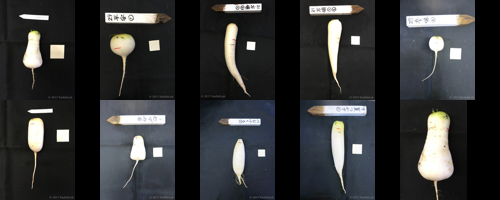

In [6]:
rd.makethumbnail(DATAFOLDER)

# (2) 画像の表示方法あれこれ

(a) 画像処理ライブラリpillowを用いた表示


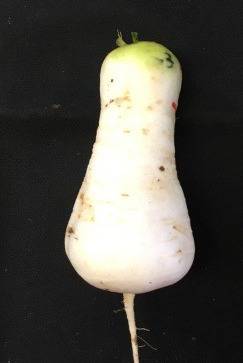

In [7]:
# PIL形式の画像が返り値の場合、jupyter notebook では何もしなくても画像として表示される
from PIL import Image
Image.open(imgfiles[9])

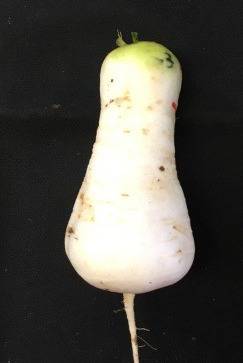

In [8]:
# OpenCVの画像データをPIL画像に変換して表示
pilimg = Image.fromarray(imgs[9][:,:,::-1])  # opencvの画像は（BGR）なので、[:,:,::-1]でRGBに変換している
pilimg

(b) IPython.display を使う方法

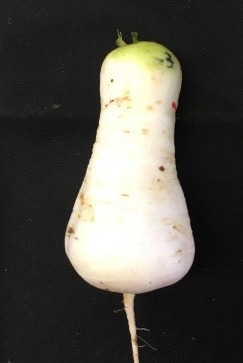

In [9]:
# IPython.display を使って、ファイル名指定で表示　PIL.Image と関数名がかぶっているので注意
from IPython import display
display.display_jpeg(display.Image(imgfiles[9]))

(c) matplotlib の pyplot.imshow() を使った表示

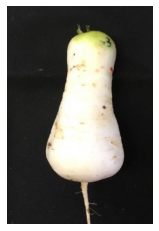

In [10]:
plt.axis('off') # 座標軸と目盛りを非表示に指定
plt.imshow(pilimg)

(d) Google Colaboratory 限定の表示方法

In [11]:
if COLABORATORY:
    from google.colab.patches import cv2_imshow
    cv2_imshow(imgs[9])

(d) OpenCV の標準的な画像表示方法　

```jupyter notebook –-NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 –-NotebookApp.port_retries=0```

- Google Colaboratory では使えない
- 別ウィンドウに表示される。ウィンドウ内にカーソルをおき、何かキーを押すと終了

In [ ]:
# ローカルPCでの実行限定
if COLABORATORY == False:
    cv2.imshow("W",imgs[9])
    cv2.waitKey(0)
    cv2.imshow("W",imgs[9])
    cv2.destroyAllWindows()

(e) RadishLib独自の画像表示関数

**plogimg(画像,レイアウト指示子)**

この関数は matplotlib の imshow() で画像を表示しています。レイアウト指示子は、matplotlib の subplot の引数と同じです。

次のセルでは先に収集した画像の０番目,３番目，９番目を横並びで表示してみています。

In [ ]:
rd.plotimg(imgs[0],131)
rd.plotimg(imgs[3],132)
rd.plotimg(imgs[9],133)

matplotlib の imshow() で描画しており、描画サイズは自動的に拡大縮小されてしまいます。

９番目（10枚目）の画像は０番目から切り出した画像なので、実際には小さいのに大きく表示されてしまっています。

同じ縮尺で複数の画像を並べて比較したい場合のために、mkparaimage(画像1,画像2）という、２枚並べた画像を作って表示します。


In [ ]:
rd.plotimg(rd.mkparaimage([imgs[0],imgs[9]]))

In [ ]:
rd.plotimg(rd.mkparaimage(imgs))

この例のように、たくさん画像を並べると、すごく小さく表示されてしまって困りものです。

大きく表示したい場合は、figsize と dpi を具体的に指定してください。

In [ ]:
plt.figure(figsize=(6,6),dpi=75) # 描画範囲を横6x75,縦6x75に指定
rd.plotimg(rd.mkparaimage([imgs[0],imgs[9]])) # 第２引数を省略すると 111

In [ ]:
plt.figure(figsize=(10,2),dpi=100)
rd.plotimg(rd.mkparaimage(imgs[::-1])) # 逆並びで表示

# (3) マージン
## マージンをつける

## **makemargin()** 
> **rd.makemargin(img,mr=倍率,mm=最小マージン)**  
> 入力  
>>   **img**

> パラメータ
>>   **mr**  相対指定（例えば 1.2 ＝2割分）によるマージン量指定  
>>   **mm**  絶対指定　（単位はピクセル）によるマージン量指定

makemargin()で画像の周りに余白部分を追加することができます。  
倍率は、原画像のサイズを１とした場合の、余白を追加したあとの画像のサイズです。
縦横の長さのうち、短いほうの長さが元の長さの mr 倍となるだけのマージンを上下左右に追加します。
ただし、mmで指定するだけのマージンは必ず確保します。

In [ ]:
 img = imgs[0]
 img12 = rd.makemargin(img,mr=1.2) # 画像サイズが1.2倍になるようにマージンをつける
 plt.figure(figsize=(6,8),dpi=100)
 rd.plotimg(rd.mkparaimage2(img,img12)) # ２枚だけ並べて表示

##  マージンをカットする
## **cutmargin()**
> **rd.cutmargin(img,mr=1.0,mm=0)**  
> 入力  
>>   **img**

> パラメータ  
>>   **mr**, **mm**  makemargin() に与えるパラメータ

後述のgetMajorWhiteArea()で取り出される最大白領域をバウンディングボックスで切り出した画像を返します。  
オプション mr, mm が指定された場合は、切り出した画像に対し、makemargin() でマージンを追加します。

## **getMajorWhite()**
> **rd.getMajorWhite(img,order=1)**  
> 入力
>>   **img**

> パラメータ
>>   **order** 取り出したい白領域の大きさの順位


In [ ]:
img = imgs[0]
bimg = rd.getMajorWhiteArea(img) # 最大白領域
mcutimg = rd.cutmargin(img)      # 白領域をバウンディングボックスで切り出す（デフォルト）
mcut12 = rd.cutmargin(img,mr=2)  # 短辺がバウンディングボックスの２倍となるだけのマージン  
mcutfix20 = rd.cutmargin(img,mm=100)  # バウンディングボックスの上下に 100 ピクセル分黒画素を追加
mp = rd.mkparaimage
plt.figure(dpi=150)
rd.plotimg(mp([img,bimg,mcutimg,mcut12,mcutfix20]))

# (4) 処理結果画像（fimg）に処理前画像（bimg）の輪郭を描く

# draw2()
処理前画像のシルエットと処理後画像を重ねた画像を作る
>**rd.draw2(bimg,fimg,thickness=1,color=(255,0,200))**   
> 入力
>>　　**bimg** 処理前画像、この画像を単純２値化した画像の輪郭が描かれる  
>>　　**fimg** 処理結果画像  
>>　　**thickness** 描画線の太さ   

> 出力　合成画像

In [ ]:
plt.figure(dpi=150)
bimg = rd.getMajorWhiteArea(img)
rd.plotimg(rd.mkparaimage([bimg,img,rd.draw2(bimg,img,thickness=2)]))